In [2]:
# Student ID: 1010752829
# Student name: Nargiz Guliyeva
# Instructor: Dr. Shion Gupa
# Course code:INF 2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 2
# Date created: 02.26.2024
# Date modified: 03.09.2024

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
sns.set()

import scipy.stats as stats
from scipy.stats import iqr

from statsmodels.graphics.factorplots import interaction_plot

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=420f0539a756207ef6500dbf8c2fad41788fe3f03fa9c45d317a7aad21fc88fb
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [4]:
# Import the excel file in the coLab "Files" section and then assign it to a new variable "data"
data=pd.read_excel("INF2178_A2_data.xlsx")

In [5]:
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [6]:
# Explore the data with the various methods using the function 'explore data'
def explore_data(data):
    data.shape # Display shape of the DataFrame
    print(f"Data Shape: {data.shape}\n")

    # Display information about the DataFrame
    print("Data Info:")
    data.info()
    print("\n")

    # Display the number of duplicated rows
    duplicated_count = data.duplicated().sum()
    print(f"Number of Duplicated Rows: {duplicated_count}\n")

explore_data(data)

Data Shape: (1063, 17)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


Number of Duplicated Rows

In [7]:
# Describe the dataset by determining descriptive statistics
# With.append method median and iqr values have been added to the table
data.describe(include='all').append(data.median().rename('median')).append((data.quantile(0.75) - data.quantile(0.25)).rename('iqr'))

<ipython-input-7-7f29065a00c9>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-7-7f29065a00c9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-7-7f29065a00c9>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-7-7f29065a00c9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
count,1063.000000,1063.000000,1063,1063,1063,1063,1063.000000,1063,715,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063,1063
unique,NaN,NaN,1058,3,1032,998,NaN,30,691,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,Blue Bell Academy Inc.,Non Profit Agency,115 WINONA DR,M4C 4X7,NaN,Public Elementary School,Apartment Building,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y
freq,NaN,NaN,2,703,3,3,NaN,301,3,NaN,NaN,NaN,NaN,NaN,NaN,718,926
mean,532.000000,8087.888053,NaN,NaN,NaN,NaN,12.511759,NaN,NaN,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506,NaN,NaN
std,307.005972,5151.252693,NaN,NaN,NaN,NaN,7.032050,NaN,NaN,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518,NaN,NaN
min,1.000000,1013.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN
25%,266.500000,1862.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000,NaN,NaN
50%,532.000000,8826.000000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000,NaN,NaN
75%,797.500000,13245.000000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000,NaN,NaN


# **Preprocessing and Treating Missing Values**

In [8]:
# Rename the columns to standartize the table
# Rename the values of CWELCC program to indicate whether the center is participate ("Part")
# or not participate in the program ("NOPart")

# Create a function
def preprocess_data(input_data):

  # Rename the columns
  input_data=input_data.rename(columns={'ward':'WARD','bldg_type':'BLDGTYPE', 'subsidy':'SUBCONTR', 'cwelcc_flag':'CWELCCFL' })

  # Encode the values for 'SUBCONTR' and 'CWELCCFL'
  input_data['CWELCCFL'].replace({'Y': "Part", 'N': 'NOPart'}, inplace=True)

  return input_data

# Apply the function to the  dataframe
data=preprocess_data(data)

In [9]:
# Treating misisng variables

# Create a function
def missing_values(input_data_missing, column_name, fill_value='Undefined'):

    # Fill missing values in the specified column with the provided fill_value
    input_data_missing[column_name].fillna(fill_value, inplace=True)

    return input_data_missing

# Apply the function to the  dataframe
data = missing_values(data, 'BLDGNAME')


# **Exploratory Data Analysis (EDA)**

In [10]:
# Examine operating agencies to explore wheter it should be further reviewed

# Separate data based on operating auspice
data_nonprofit=data[data['AUSPICE'] == 'Non Profit Agency']
data_commercial=data[data['AUSPICE'] == 'Commercial Agency']
data_public=data[data['AUSPICE'] == 'Public (City Operated) Agency']

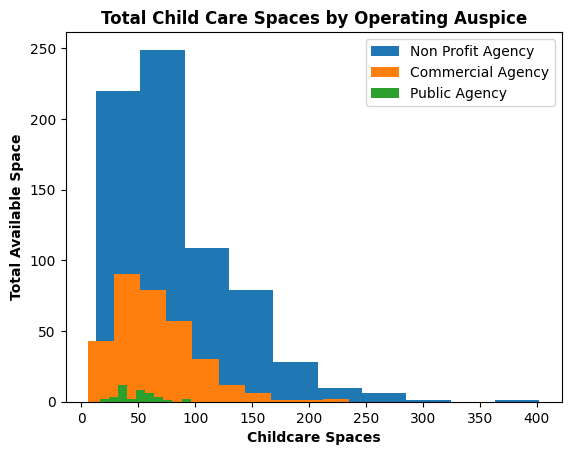

In [ ]:
# Set the style to of the vizualization
plt.style.use("default")

# Plot histogram for each of the operating auspices
fig, ax =plt.subplots()
ax.hist(data_nonprofit['TOTSPACE'], label="Non Profit Agency", bins=10)
ax.hist(data_commercial['TOTSPACE'], label='Commercial Agency', bins=10)
ax.hist(data_public['TOTSPACE'], label='Public Agency', bins=10)

# set the label names
ax.set_xlabel("Childcare Spaces", fontweight='bold')
ax.set_ylabel("Total Available Space", fontweight='bold')
ax.set_title("Total Child Care Spaces by Operating Auspice", fontweight='bold')

# Add legend
ax.legend()

# Display the plot
plt.show()

#Reference: Datacamp Matplotlib Course

In [11]:
# Examine the descriptive statistics for the total space

# Create function
def stats_table(data_subset, auspice_name):

    # Calculate statistics for 'TOTSPACE'
    median_auspice = data_subset['TOTSPACE'].median()
    iqr_auspice = iqr(data_subset['TOTSPACE'])
    sum_auspice = data_subset['TOTSPACE'].sum()
    max_auspice = data_subset['TOTSPACE'].max()
    min_auspice = data_subset['TOTSPACE'].min()

    # Create a dictionary for the statistics
    table_auspice = {
        auspice_name: [median_auspice, iqr_auspice, sum_auspice, max_auspice, min_auspice]
    }

    # Use metrics as index
    metrics = ['Median', 'IQR', 'Sum', 'Max', 'Min']

    # Create a DataFrame from the dictionary
    statistics_table = pd.DataFrame(table_auspice, index=metrics)

    # Transpose the DataFrame
    statistics_table = statistics_table.T

    return statistics_table

# Generate tables for each operating auspice
table_nonprofit = stats_table(data_nonprofit, 'Nonprofit')
table_commercial = stats_table(data_commercial, 'Commercial')
table_public = stats_table(data_public, 'Public')

# Concatenate the tables
statistics_table = pd.concat([table_nonprofit, table_commercial, table_public])

# Print the combined statistics table
print(statistics_table)


            Median   IQR      Sum    Max   Min
Nonprofit     66.0  62.0  57719.0  402.0  13.0
Commercial    58.0  48.0  20860.0  235.0   6.0
Public        49.0  26.0   1863.0   96.0  16.0


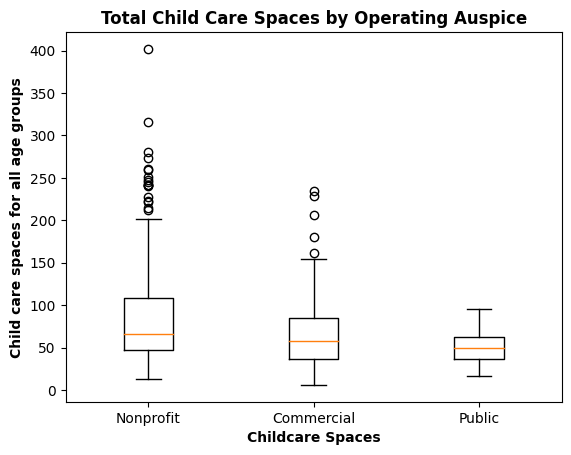

In [12]:
# Create a boxplot to compare the operating agencies and visualize the outliyers

# Set the default plotting style
plt.style.use("default")

# Create subplots
fig, ax = plt.subplots()

# Create a boxplot for each operating auspice
ax.boxplot([data_nonprofit['TOTSPACE'], data_commercial['TOTSPACE'], data_public['TOTSPACE']])

# Set axis labels
ax.set_xticklabels(["Nonprofit", "Commercial", "Public"])
ax.set_xlabel("Childcare Spaces", fontweight='bold')
ax.set_ylabel("Child care spaces for all age groups", fontweight='bold')
ax.set_title("Total Child Care Spaces by Operating Auspice", fontweight='bold')

# Display the plot
plt.show()

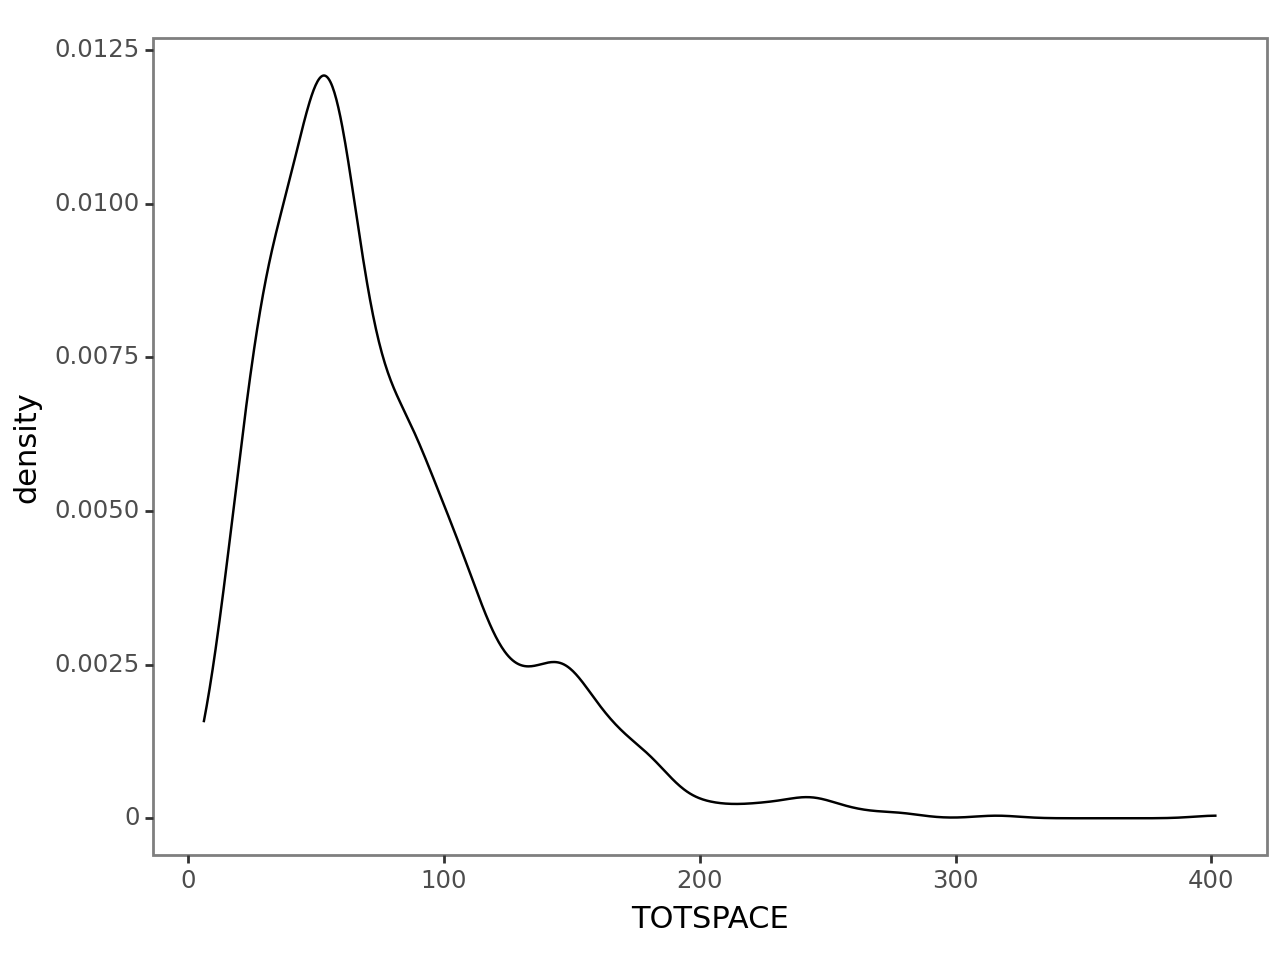

In [13]:
# Examine the continious variable total childcare spaces
# NOTE: The plot has been skewed so consider transformation if used in the model

plot_totspace=(p9.ggplot(data) + p9.aes(x="TOTSPACE") + p9.geom_density(alpha=0.5))
plot_totspace = plot_totspace + p9.theme_bw() + p9.theme(panel_grid=p9.element_blank())
print(plot_totspace)

# Source: DataCamp

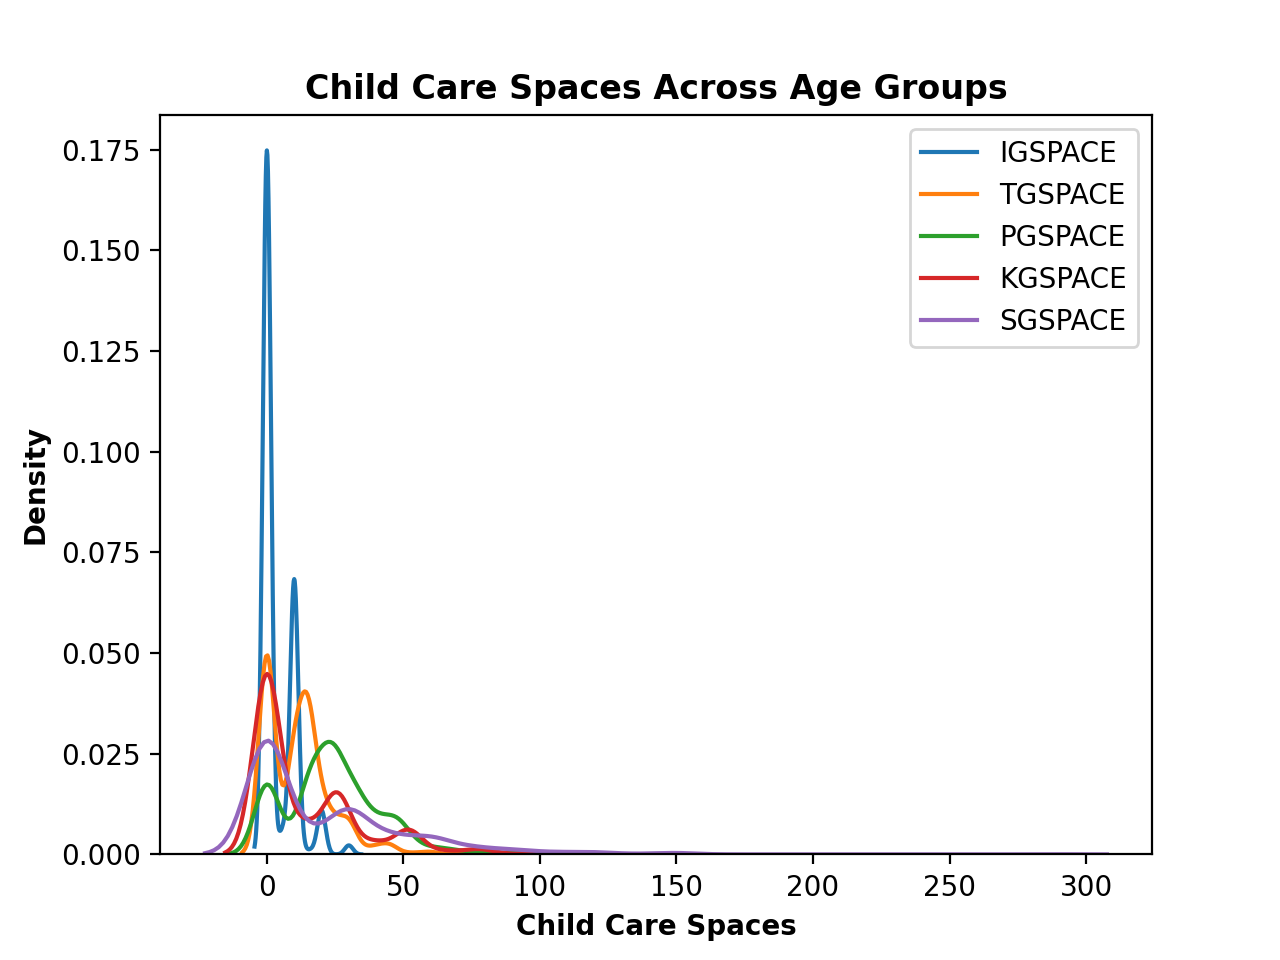

In [14]:
# Examine the availability of the childcare spaces based on different age groups
# NOTE: the data for all age groups have been skewed
fig, ax = plt.subplots()

#  Kernel density estimate (KDE) plot for each column
for column in ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']:
    sns.kdeplot(data[column], ax=ax, label=column)

# Add labels, title, and legends
ax.set_xlabel('Child Care Spaces', fontweight='bold')
ax.set_ylabel('Density', fontweight='bold')
ax.set_title('Child Care Spaces Across Age Groups', fontweight='bold')
ax.legend()

# Display
plt.show()

<ipython-input-15-f1a8e109e730>:28: UserWarning: FixedFormatter should only be used together with FixedLocator


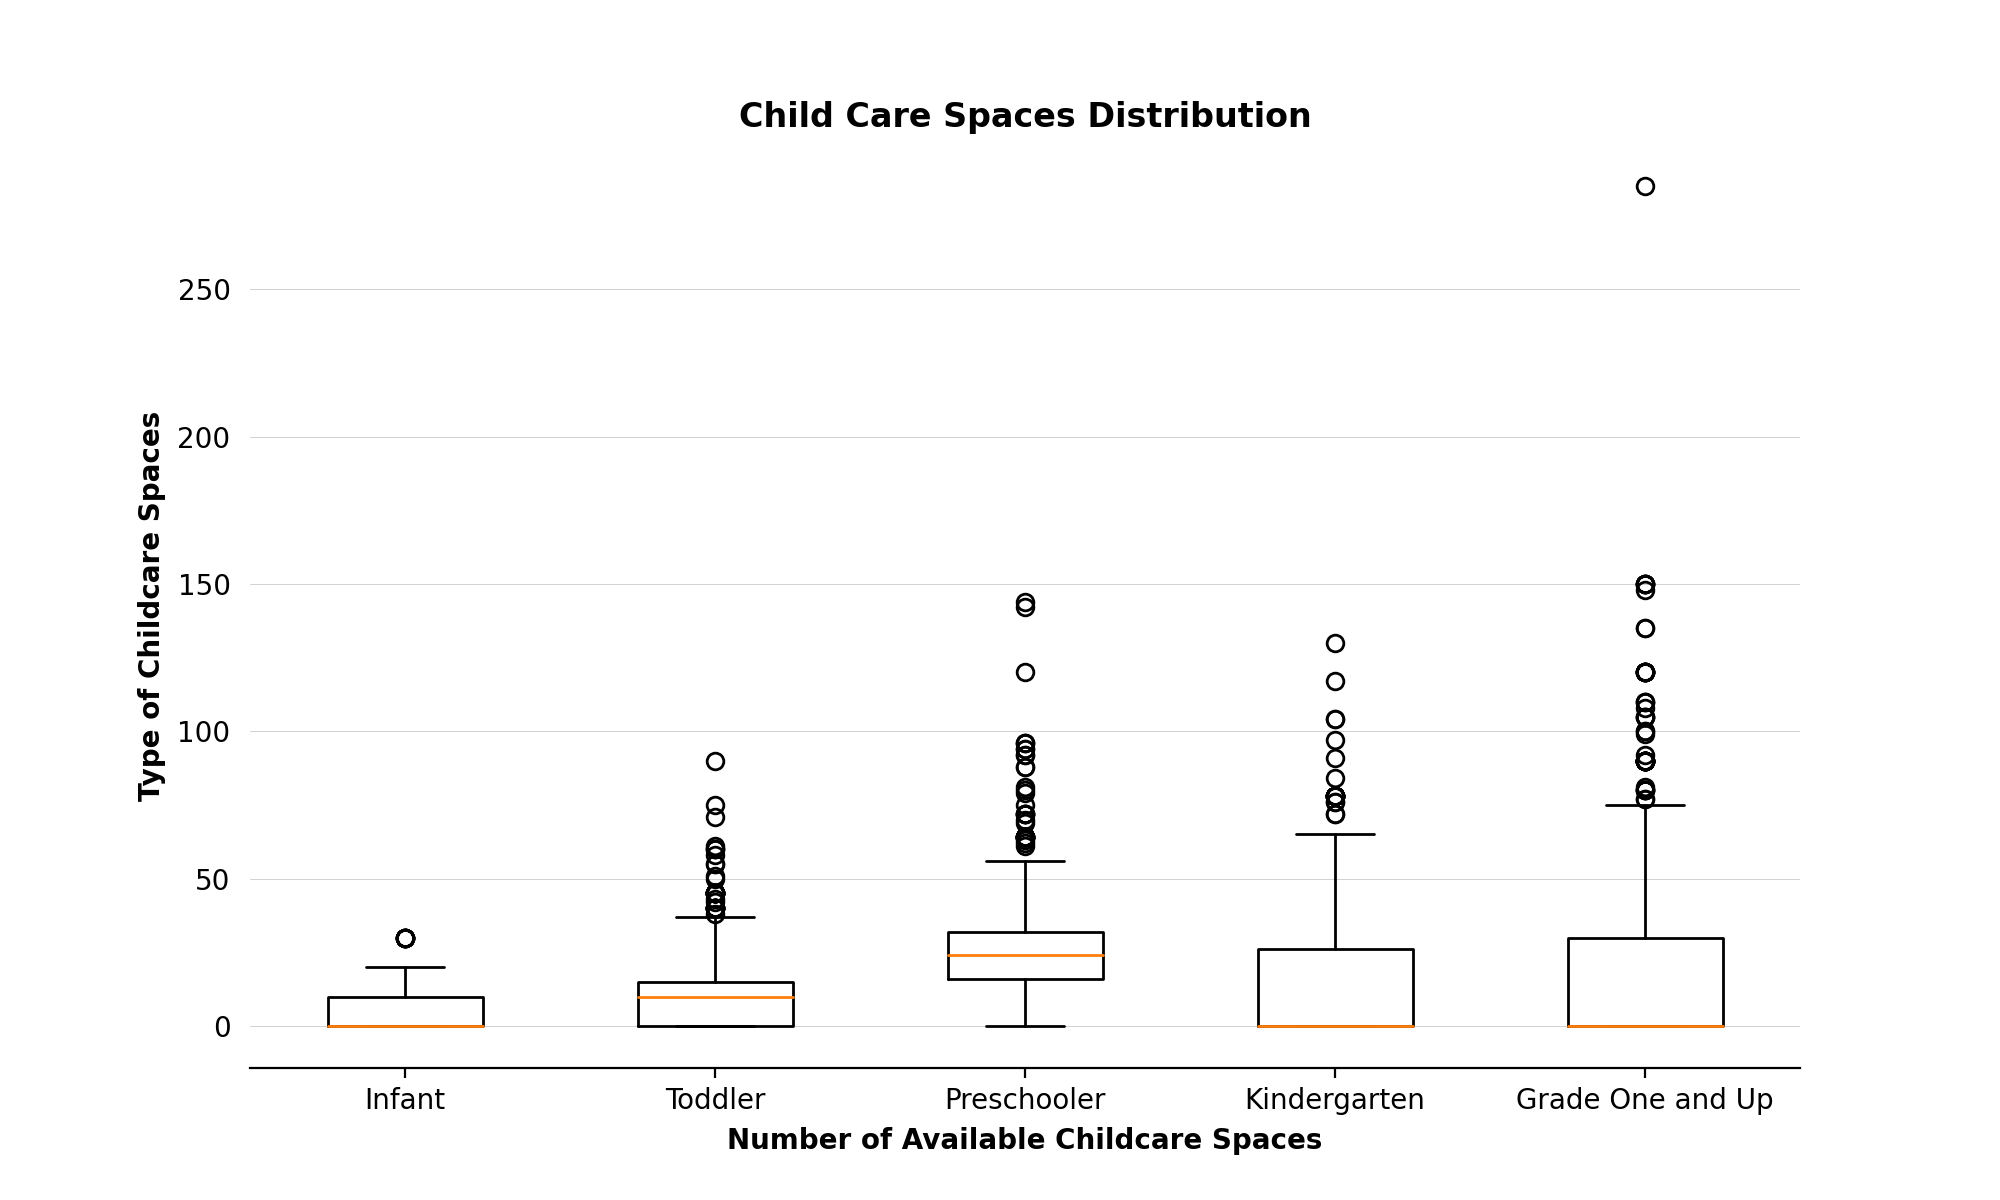

In [15]:
# Considering that it is hard to make inferences from above vizualization the same data
# has been vizualized as a boxplot for the convinience

# Visualize the distribution of childcare spaces across different age groups
fig, ax = plt.subplots(figsize=(10, 6))

# Remove top and right borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set a white background for a cleaner appearance
sns.set_style("white")

# Remove y-axis tick marks for simplicity
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis for reference
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and axis labels
ax.set_title('Child Care Spaces Distribution', fontweight='bold')
ax.set_xlabel('Number of Available Childcare Spaces', fontweight='bold')
ax.set_ylabel('Type of Childcare Spaces', fontweight='bold')

# Set age group names as labels for the boxplot
age_groups = ['Infant', 'Toddler', 'Preschooler', 'Kindergarten', 'Grade One and Up']
ax.set_xticklabels(age_groups)

# Create a boxplot for each age group
dataset = [data['IGSPACE'], data['TGSPACE'], data['PGSPACE'], data['KGSPACE'], data['SGSPACE']]
ax.boxplot(dataset)

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


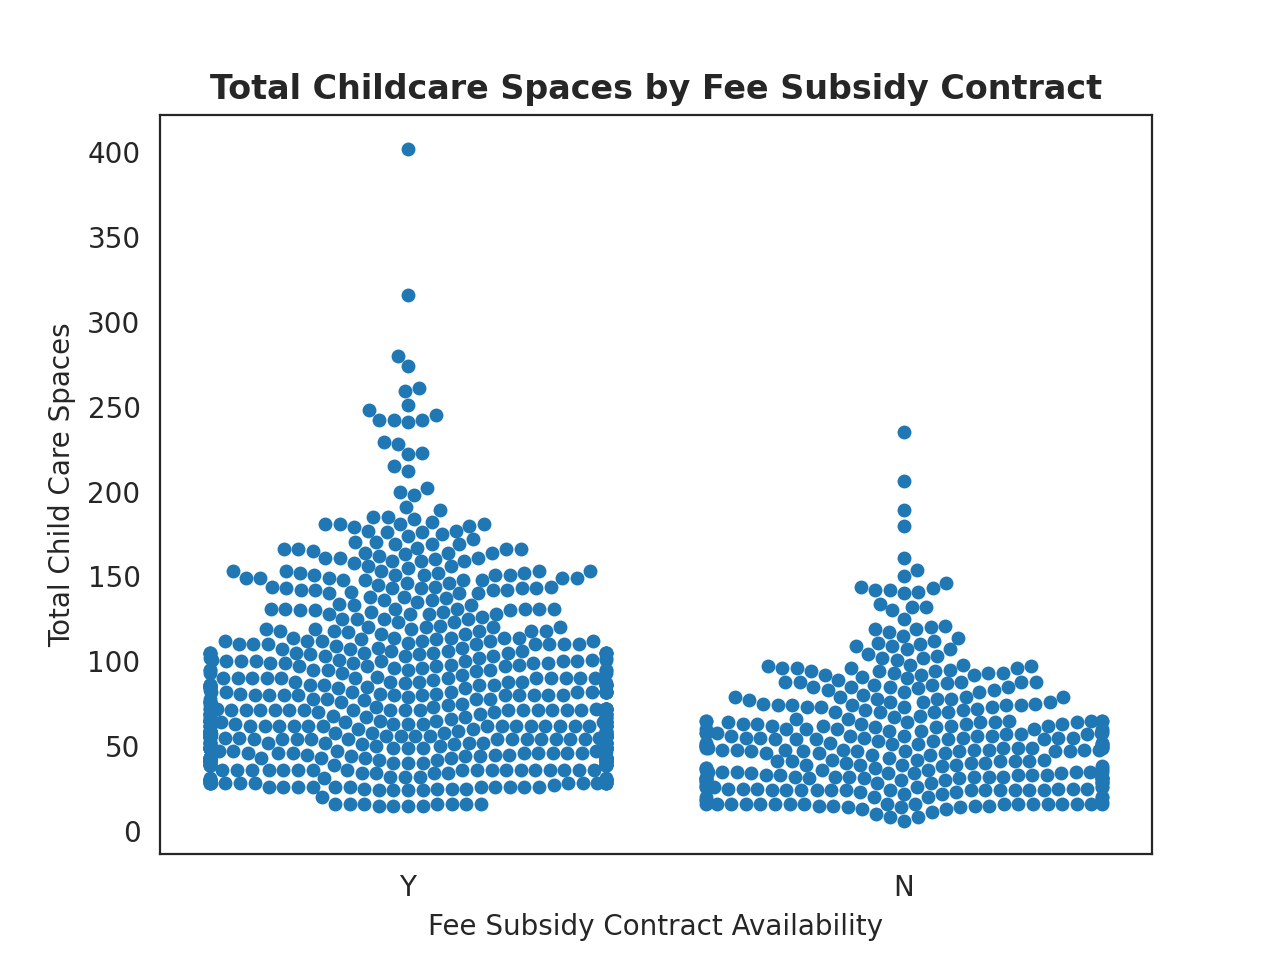

In [16]:
# Examine the total childcare space availability based on the centers participation
# in the fee subsidy contract program

# Vizualize the distribution using the swarm plot
sns.swarmplot(x='SUBCONTR', y='TOTSPACE', data=data)

#Set labels and titles
plt.xlabel('Fee Subsidy Contract Availability')
plt.ylabel('Total Child Care Spaces')
plt.title('Total Childcare Spaces by Fee Subsidy Contract', fontweight='bold')

# Display
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


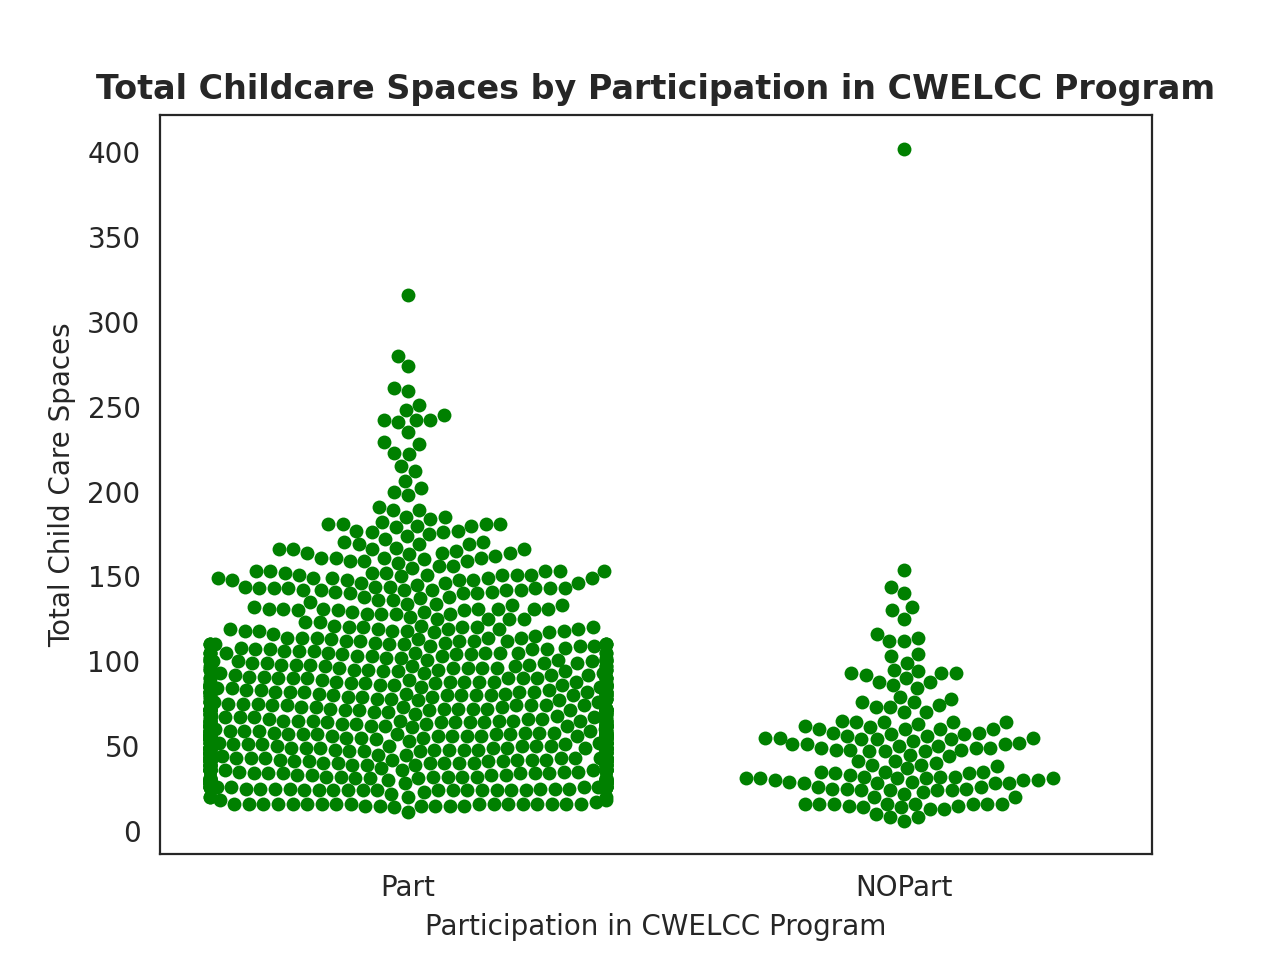

In [17]:
# Examine the total childcare space availability based on the centers participation
# in the CWELCC program

# Vizualize the distribution
sns.swarmplot(x='CWELCCFL', y='TOTSPACE', data=data, color='green')

# Set the labels and the title
plt.xlabel('Participation in CWELCC Program')
plt.ylabel('Total Child Care Spaces')
plt.title('Total Childcare Spaces by Participation in CWELCC Program', fontweight='bold')

# Display the plot
plt.show()

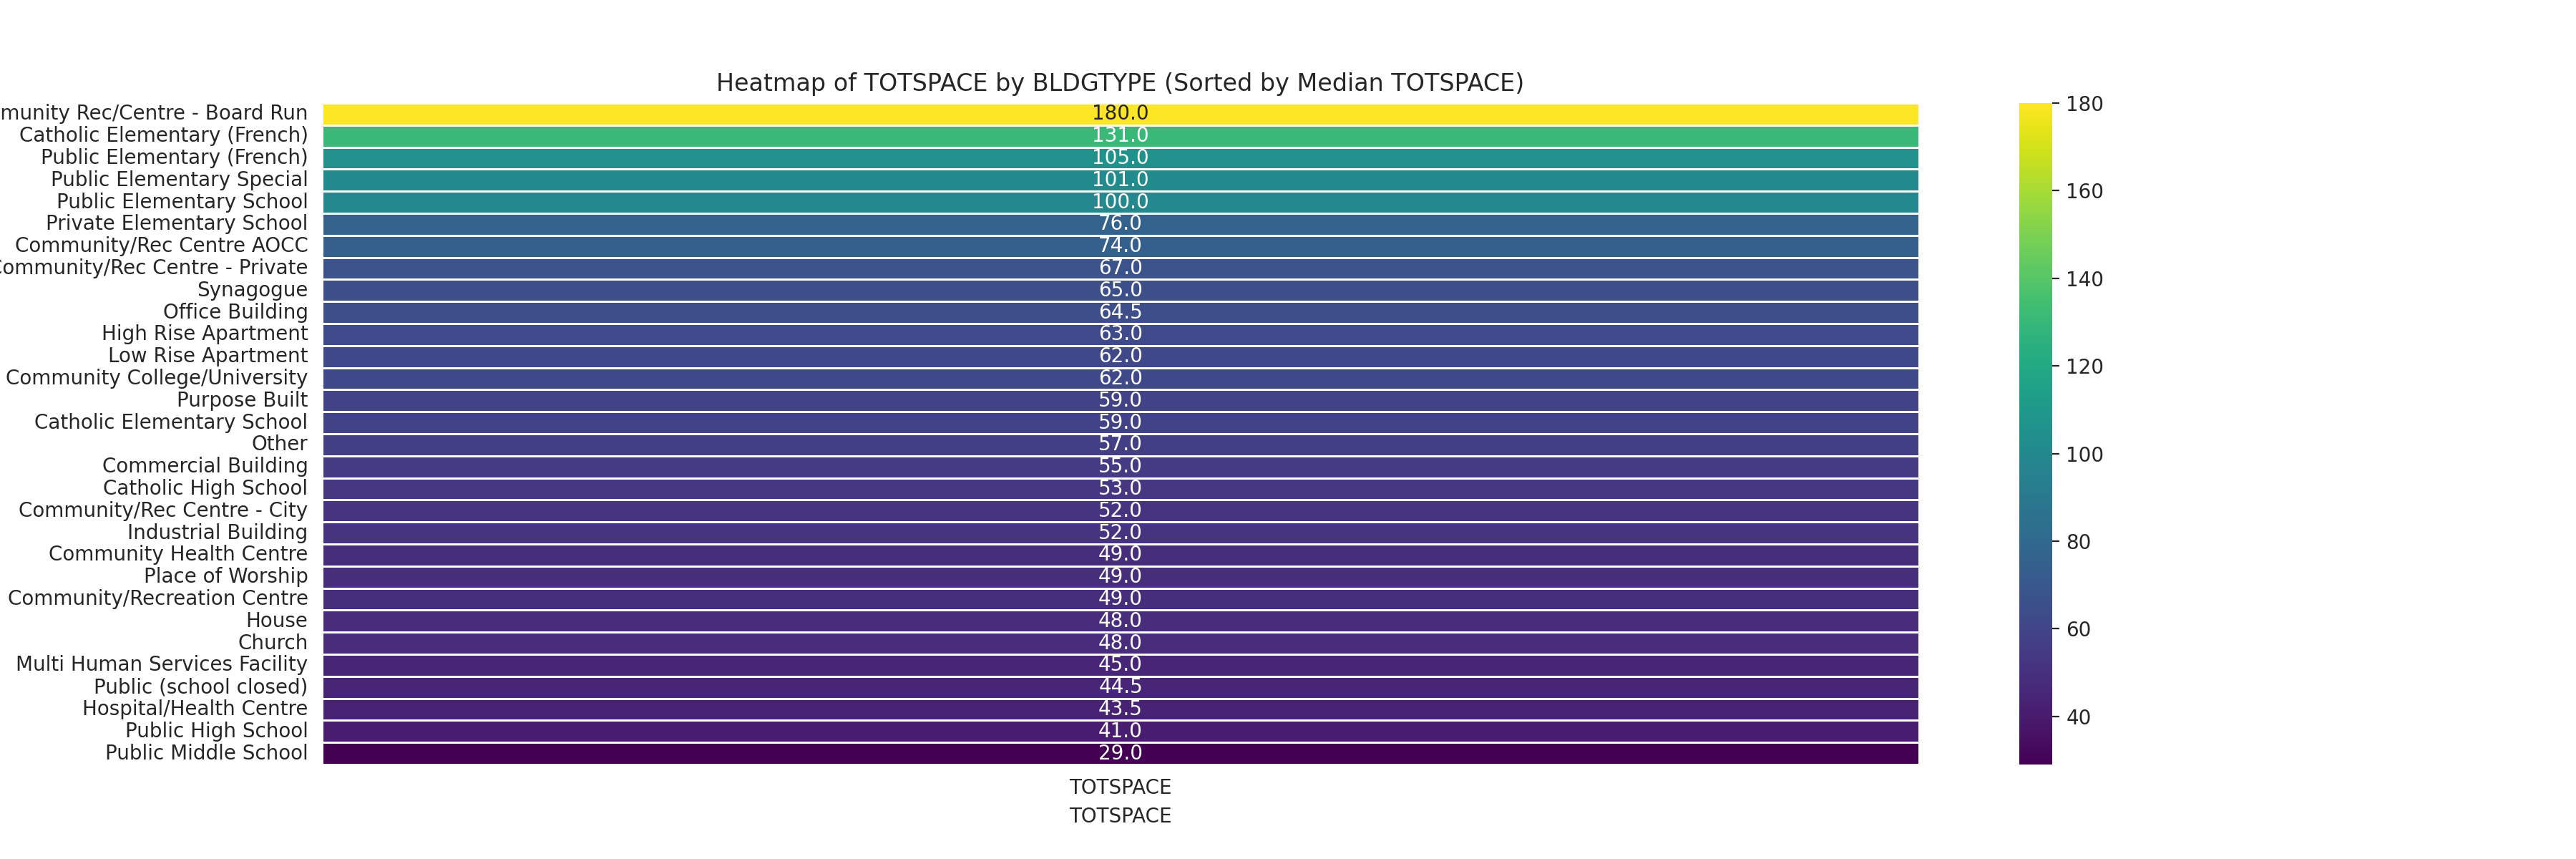

In [18]:
# Identify which building type has the highest number of the total spaces

# Pivot the data to create a matrix for the heatmap
heatmap_data = data.pivot_table(index='BLDGTYPE', values='TOTSPACE', aggfunc='median')

# Sort the rows based on median TOTSPACE values in descendign order
heatmap_data = heatmap_data.sort_values(by='TOTSPACE', ascending=False)

# Create a heatmap using seaborn
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

# Set labels and title
plt.xlabel('TOTSPACE')
plt.ylabel('BLDGTYPE')
plt.title('Heatmap of TOTSPACE by BLDGTYPE (Sorted by Median TOTSPACE)')

# Show the plot
plt.show()

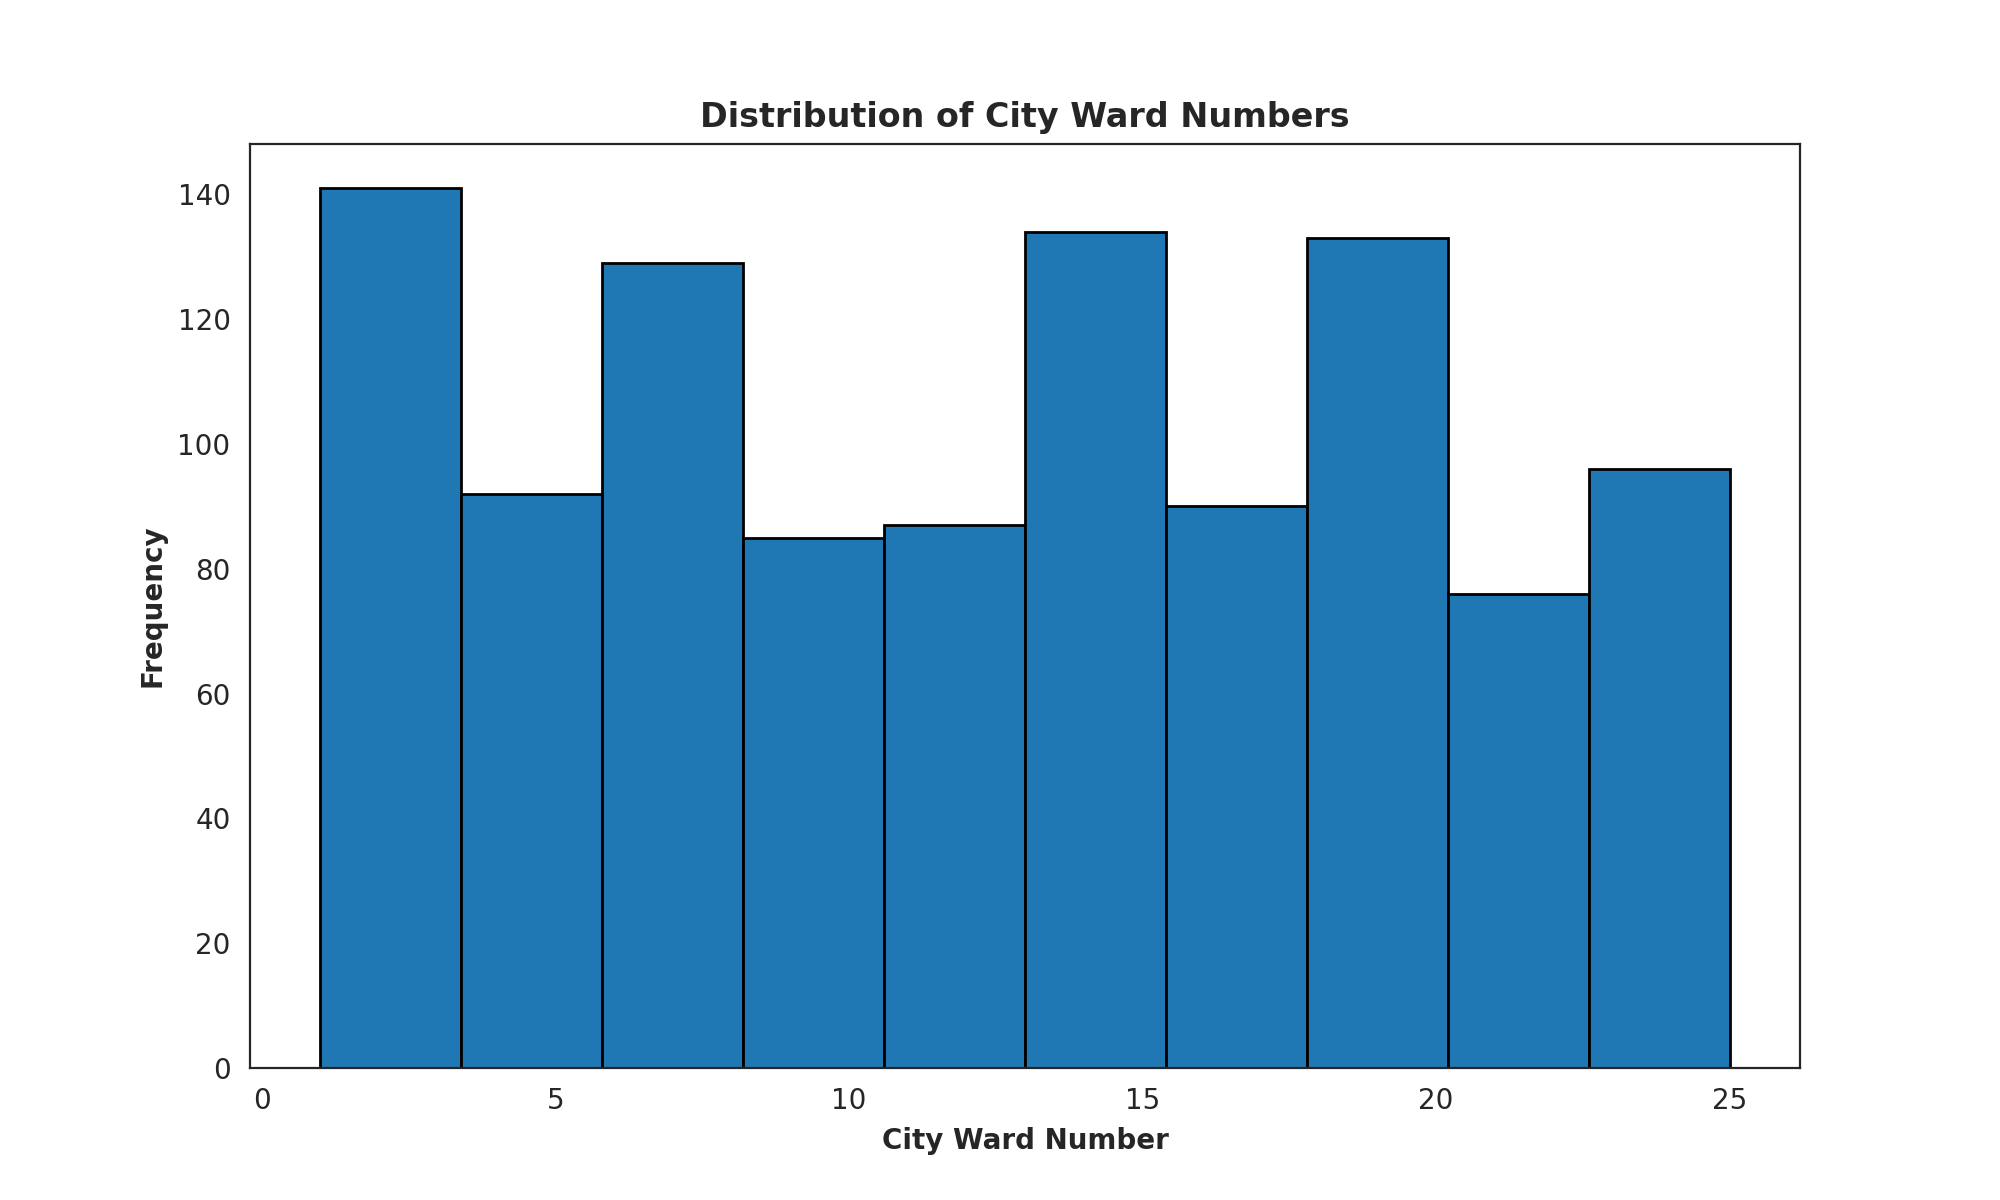

In [19]:
# Examine the ward number and identtify wheter to use it for the statistical testing
# NOTE: The data on the ward number is not normally distributed

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['WARD'], bins=10, edgecolor='black')

# Set the labels and a title
plt.xlabel('City Ward Number', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of City Ward Numbers', fontweight='bold')

# Display
plt.show()

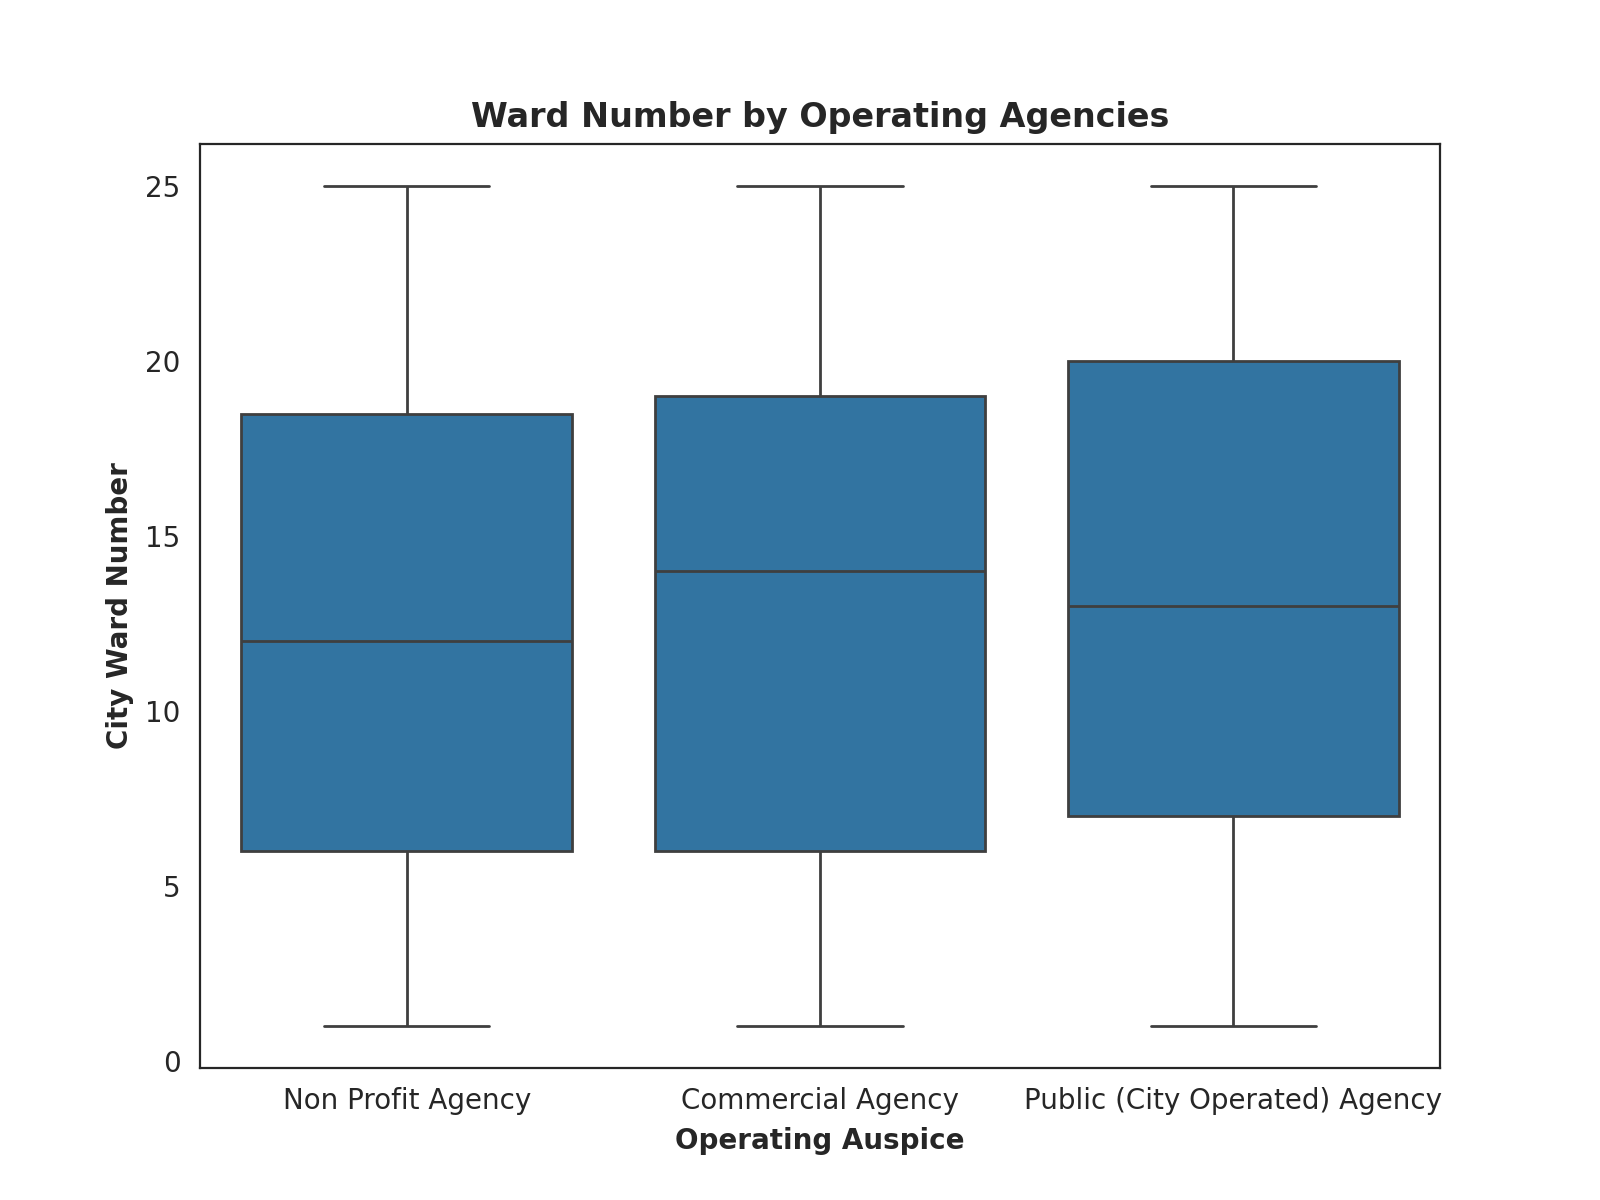

In [20]:
# Compare the operating auspises by the number of available ward
# NOTE: Commercial agencies has slightly higher median of the ward number.
# Otherwise, three operating auspices ward numbers are close to each other

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='AUSPICE', y='WARD', data=data)

# Set label and title
plt.xlabel('Operating Auspice',fontweight = 'bold')
plt.ylabel('City Ward Number',fontweight = 'bold')
plt.title('Ward Number by Operating Agencies', fontweight = 'bold')

# Display
plt.show()

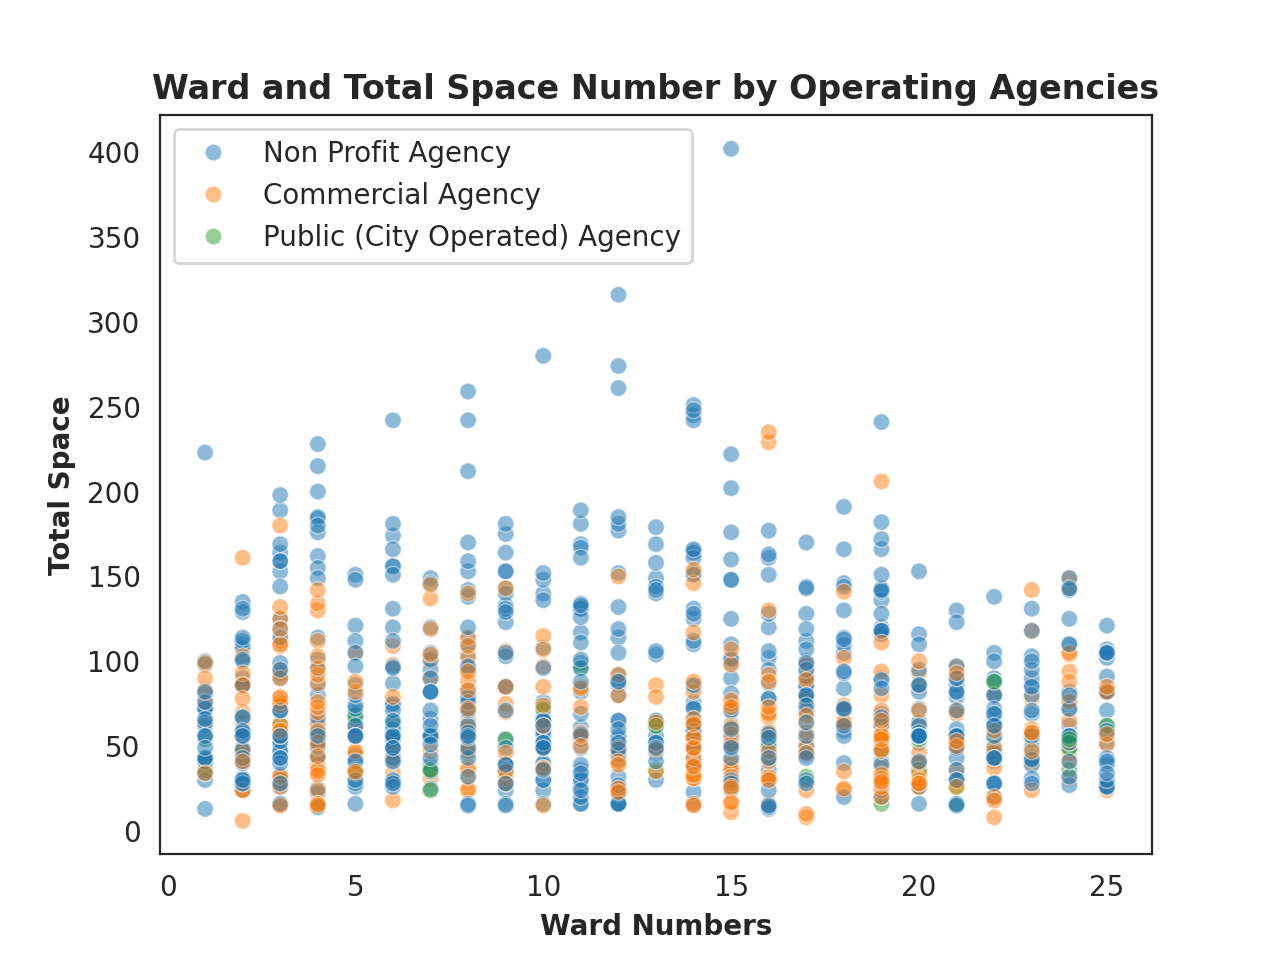

In [21]:
# Explore the intersection of ward number, total space, and operating auspices

sns.scatterplot(x='WARD', y= 'TOTSPACE', hue='AUSPICE', data=data, alpha=0.5)

# Set label, title, and legends
plt.xlabel('Ward Numbers',fontweight = 'bold')
plt.ylabel('Total Space',fontweight = 'bold')
plt.title('Ward and Total Space Number by Operating Agencies', fontweight = 'bold')
plt.legend()

# Display the resul
plt.show()

<ipython-input-22-0f824ff7e9c4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



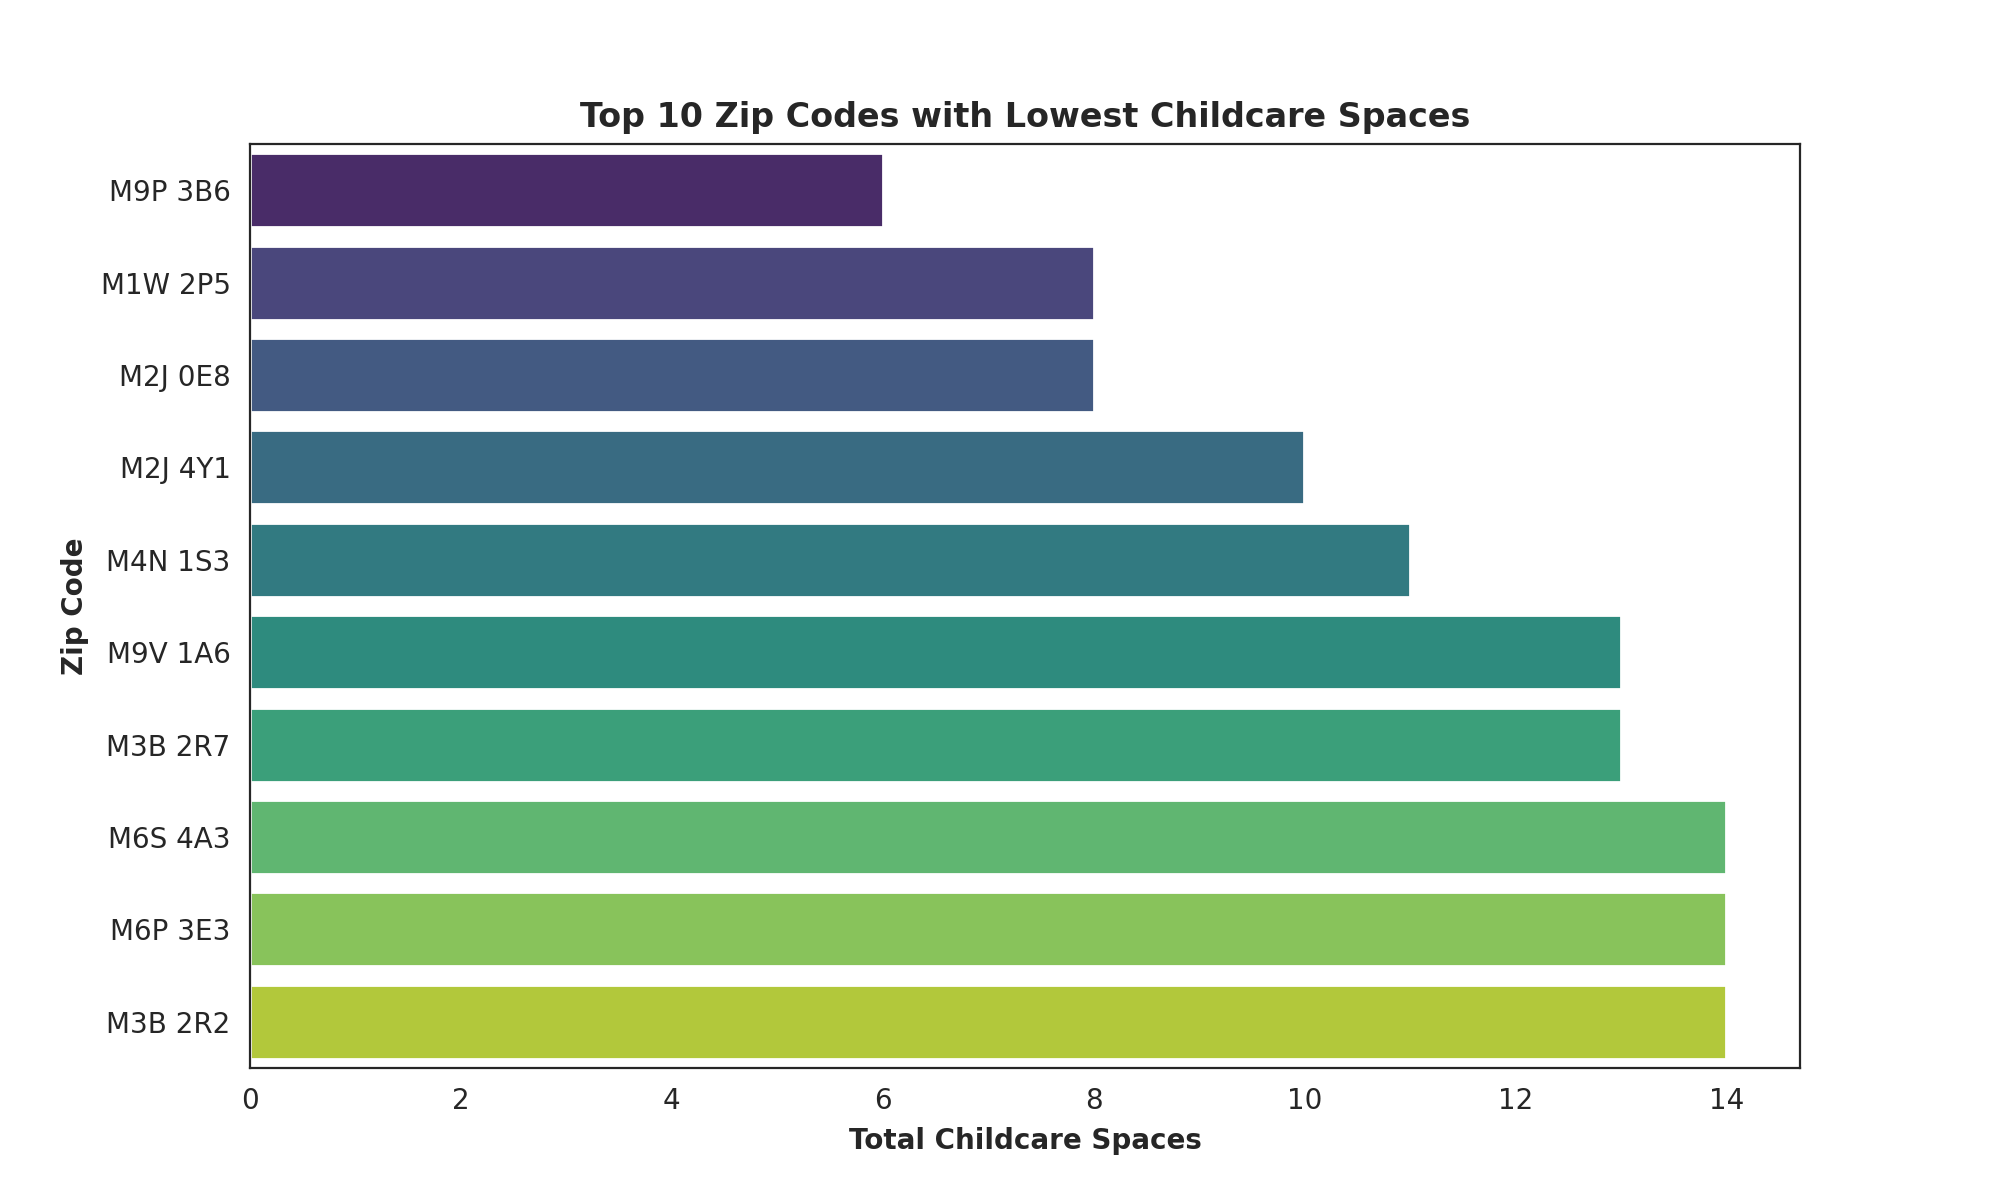

In [22]:
# Explore the areas in Toronto that have a list number of total space available for childcare

# Sort the data to get the top lowest childcare spaces
sorted_data = data.sort_values(by='TOTSPACE')
top_10_lowest_spaces = sorted_data.head(10)

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='TOTSPACE', y='PCODE', data=top_10_lowest_spaces, palette='viridis')

# Set the label and titles
plt.xlabel('Total Childcare Spaces', fontweight="bold")
plt.ylabel('Zip Code', fontweight="bold")
plt.title('Top 10 Zip Codes with Lowest Childcare Spaces', fontweight='bold')
plt.show()

# **One Way ANOVA**

Research question:
*Is there a statistically significant difference in the total child care spaces among different operating agencies in Toronto, considering the challenges associated with high fees and low availability of child care spaces?*

### **ANOVA Model**


In [23]:
# Logarithmic transformation considering that the total space is skewed
data['log_TOTSPACE'] = np.log(data['TOTSPACE'])

In [24]:
# Fit the Ordinary Least Squares(OLS) model
model = ols('log_TOTSPACE ~ C(AUSPICE)', data=data).fit()

# Execute ANOVA Analysis to obtain the table
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(AUSPICE),14.143756,2.0,18.430433,1.354538e-08
Residual,406.728946,1060.0,NaN,NaN


In [25]:
# Create an instance of the stat() class
res=stat()
res.anova_stat(df=data, res_var="log_TOTSPACE", anova_model=('log_TOTSPACE ~ C(AUSPICE)'))
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,14.143756,7.071878,18.430433,1.354538e-08
Residual,1060.0,406.728946,0.383707,NaN,NaN


### **Post-hoc test**

In [26]:
# Create an instance of the stat() class
res_log_transformed = stat()

# Perform Tukey's HSD post hoc test
res_log_transformed.tukey_hsd(df=data, res_var="log_TOTSPACE", xfac_var="AUSPICE", anova_model=('log_TOTSPACE ~ C(AUSPICE)'))
res_log_transformed.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,0.205307,0.107371,0.303243,6.958243,0.001000
1,Non Profit Agency,Public (City Operated) Agency,0.423834,0.184660,0.663008,5.881919,0.001000
2,Commercial Agency,Public (City Operated) Agency,0.218527,-0.028014,0.465067,2.942074,0.094383


### **Assumption Check for one-way ANOVA**

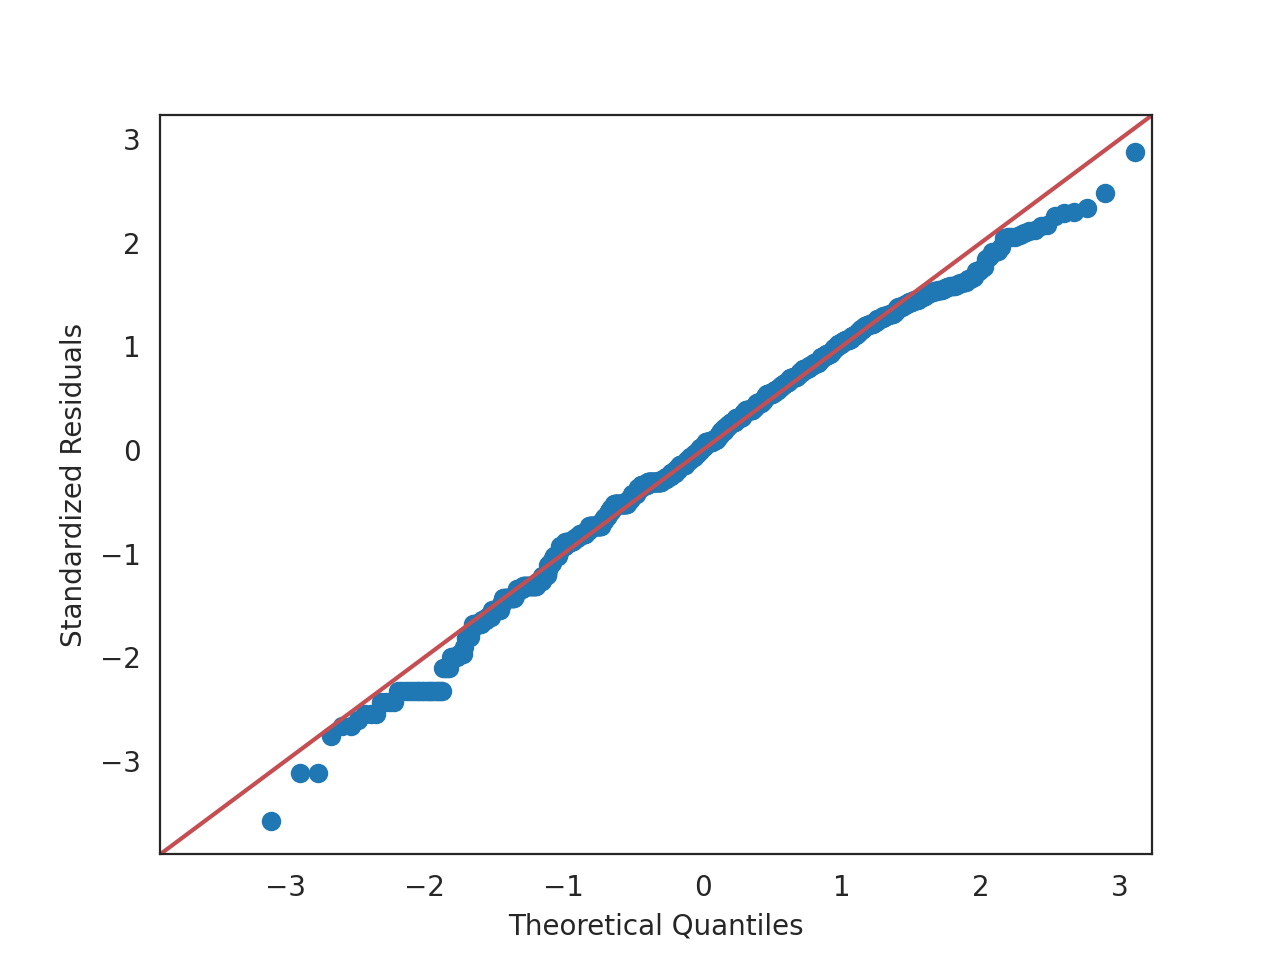

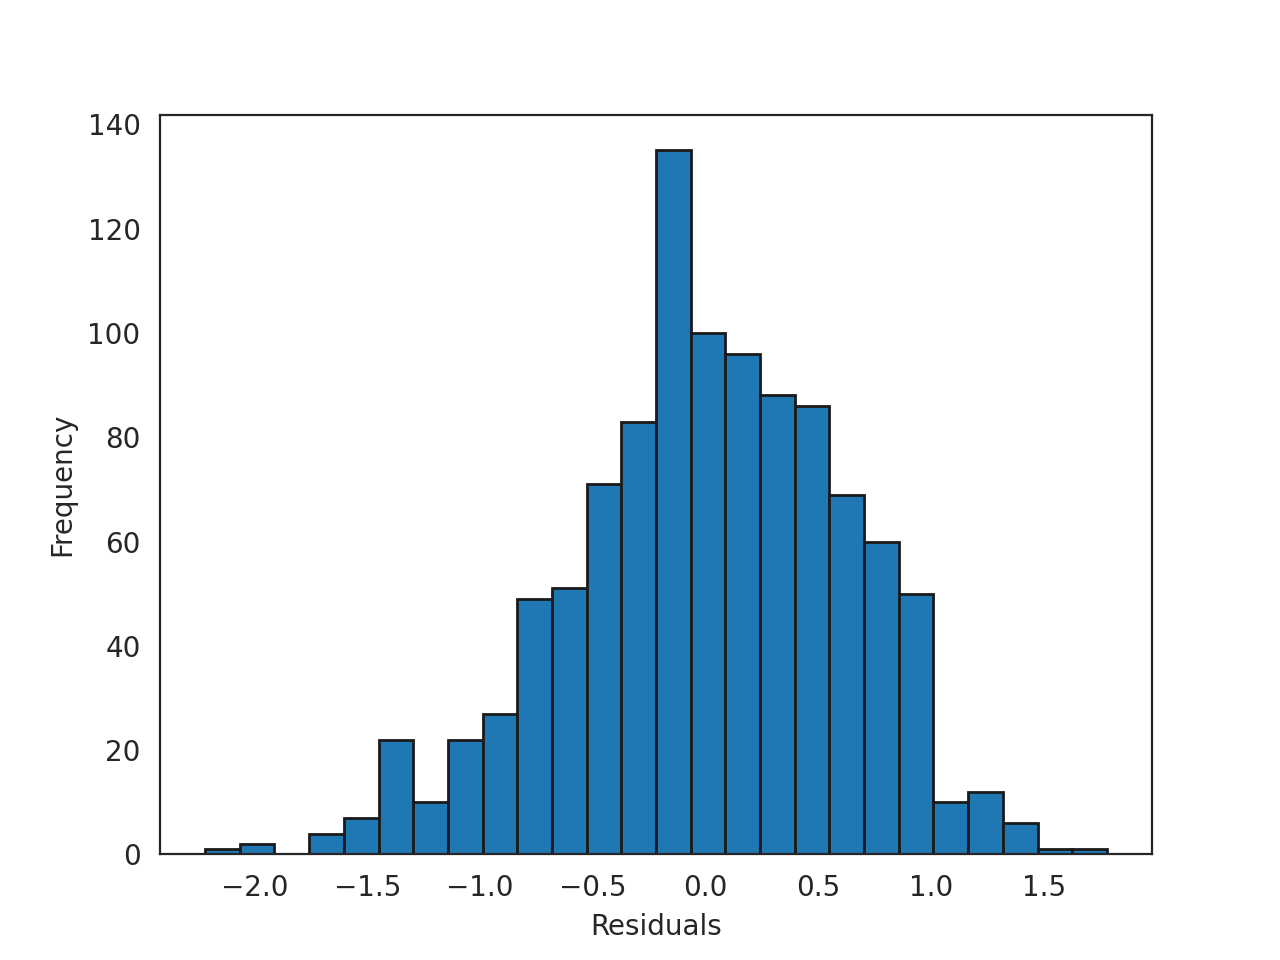

In [27]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [28]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=data, res_var='log_TOTSPACE', xfac_var="AUSPICE")
res.levene_summary

,Parameter,Value
0,Test statistics (W),5.4256
1,Degrees of freedom (Df),2.0000
2,p value,0.0045


### **One-way ANOVA Model**

#### ***Findings:***

Log transformation has been employed on the continuous variable (`TOTSPACE`) to make the data more symmetric and homoscedastic.

There is a statistically significant difference in the total child care spaces among commercial, non-profit, and public agencies in Ontario, with F=18.430433 and p=0.00000001354538.

We reject the null hypothesis and conclude that at least one operating agency has a different mean total child care spaces compared to the others.

The post-hoc test reveals statistically significant differences in mean total child care spaces between Non-Profit Agencies and Commercial Agencies, with a p-value of 0.001. The result indicates a significant mean difference of 0.205 child care spaces, with a 95% confidence interval ranging from 0.107 to 0.303.

The post-hoc test also reveals statistically significant differences in mean total child care spaces between Non-Profit Agencies and Public Agencies, with a p-value of 0.001. The result indicates a significant mean difference of 0.424 child care spaces, with a 95% confidence interval ranging from 0.185 to 0.663.

Additionally, the post-hoc test indicates no statistically significant differences in mean total child care spaces between Commercial and Public Agencies, with a p-value of 0.094383.

The assumption check suggests the following:
- Skewness in the histogram and deviations from the diagonal line in the QQ plot indicate that the standardized residuals are not normally distributed. Right-skewness in the histogram suggests that there may be a concentration of residuals with higher values.
- The null hypothesis in Levene's test is that the variances across different groups are equal. The small p-value (0.0045) suggests that there is strong evidence to reject the null hypothesis. The low p-value indicates that variances are significantly different among the operating auspices. The variances are not homogeneous across the different operating auspices.

Based on the assumptions above, the robustness of the results may be reconsidered. Specifically, the violation of the normality assumption may affect the reliability of p-values and confidence intervals. The violation of the homogeneity of variances assumption could impact the validity of the ANOVA results.



Reference:

One-way ANOVA, Retrieved from
https://www.pythonfordatascience.org/anova-python/

Childs, D. Z., Hindle, B. J., & Warren, P. H. (Year). APS 240: Data Analysis and Statistics with R, Retrieved from https://dzchilds.github.io/stats-for-bio/data-transformations.html

Does your data violate one-way ANOVA assumptions?, Retrieved from https://quality-control-plan.com/StatGuide/oneway_anova_ass_viol.htm#:~:text=If%20the%20populations%20from%20which,may%20be%20incorrect%20or%20misleading.

# **Two-way ANOVA**

Research question: *Is there a statistically significant joint effect of having a* *fee subsidy contract* *and being part of a* *CWELCC program* *on the total child care spaces available for all age groups in child care centers?*

research questin: *Do these categorical variables interact in a way that significantly influences the variation in child care spaces?*

In [29]:
# `log_TOTSPACE` will be used as it is in the above model

# Fit the Two-Way ANOVA model
tanova_model=ols('log_TOTSPACE ~ C(SUBCONTR) + C(CWELCCFL) + C(SUBCONTR):C(CWELCCFL)', data=data).fit()
tanova_table = sm.stats.anova_lm(tanova_model, typ=2)

# Display the table
tanova_table

,sum_sq,df,F,PR(>F)
C(SUBCONTR),19.920678,1.0,56.030970,1.497549e-13
C(CWELCCFL),3.730290,1.0,10.492201,1.236067e-03
C(SUBCONTR):C(CWELCCFL),3.107954,1.0,8.741755,3.179021e-03
Residual,376.506028,1059.0,NaN,NaN


In [30]:
# This version includes mean square value as well

# Create a 'stat' object
res2 = stat()
res2.anova_stat(df=data, res_var='log_TOTSPACE', anova_model='log_TOTSPACE ~ C(SUBCONTR) + C(CWELCCFL) + C(SUBCONTR):C(CWELCCFL)')

# Display
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(SUBCONTR),1.0,19.920678,19.920678,56.030970,1.497549e-13
C(CWELCCFL),1.0,3.730290,3.730290,10.492201,1.236067e-03
C(SUBCONTR):C(CWELCCFL),1.0,3.107954,3.107954,8.741755,3.179021e-03
Residual,1059.0,376.506028,0.355530,NaN,NaN


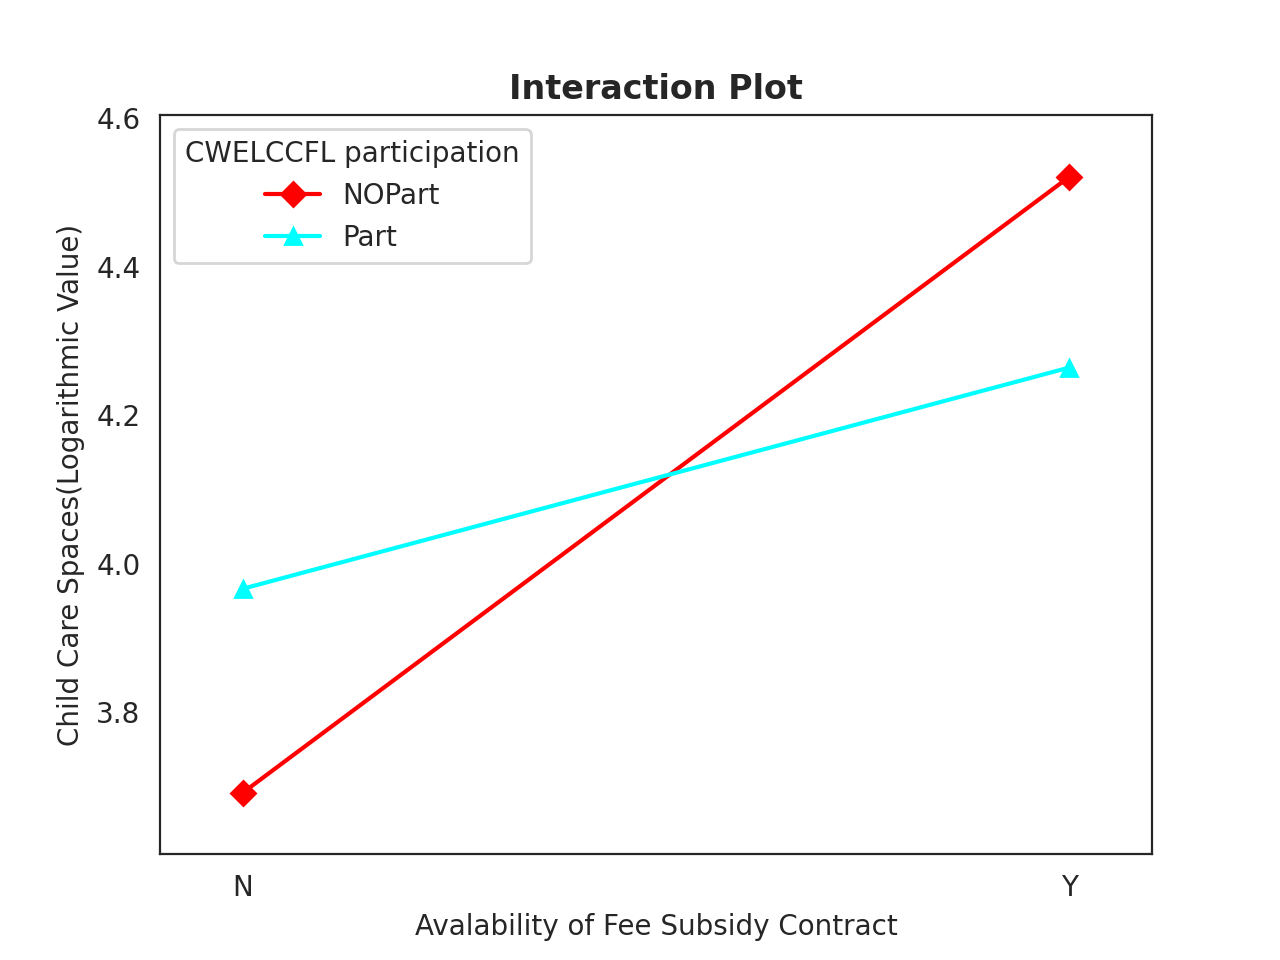

In [31]:
# Vizualize the interaction plot
# NOTE: The interaction plot has worked previously, however once checking before submission it shows the error
# Despite reseting index, it stil does not work data_reset_index = data.reset_index(drop=True)

# Create a subplot
fig, ax = plt.subplots()

# Create interaction_plot
interaction_plot(x=data['SUBCONTR'], trace=data['CWELCCFL'], response=data['log_TOTSPACE'], markers=["D", "^"], ax=ax)

# Customize the plot
ax.set_title('Interaction Plot', fontweight='bold')
ax.set_xlabel('Avalability of Fee Subsidy Contract')
ax.set_ylabel('Child Care Spaces(Logarithmic Value)')
ax.legend(title='CWELCCFL participation')

# Display
plt.show()


In [32]:
# Create a Tukey HSD test for multiple comparisons
res.tukey_hsd(df=data, res_var='log_TOTSPACE',xfac_var=['SUBCONTR','CWELCCFL'],anova_model='log_TOTSPACE ~ C(SUBCONTR) + C(CWELCCFL) + C(SUBCONTR):C(CWELCCFL)')
res.tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Part)","(Y, NOPart)",0.256861,-0.172573,0.686295,2.176605,0.415859
1,"(Y, Part)","(N, Part)",0.297904,0.179623,0.416186,9.165143,0.001000
2,"(Y, Part)","(N, NOPart)",0.572653,0.423246,0.722061,13.947515,0.001000
3,"(Y, NOPart)","(N, Part)",0.554766,0.116900,0.992631,4.610484,0.006311
4,"(Y, NOPart)","(N, NOPart)",0.829514,0.382235,1.276793,6.748748,0.001000
5,"(N, Part)","(N, NOPart)",0.274749,0.102600,0.446897,5.807780,0.001000


#### **Assumption Check for Two-way ANOVA**

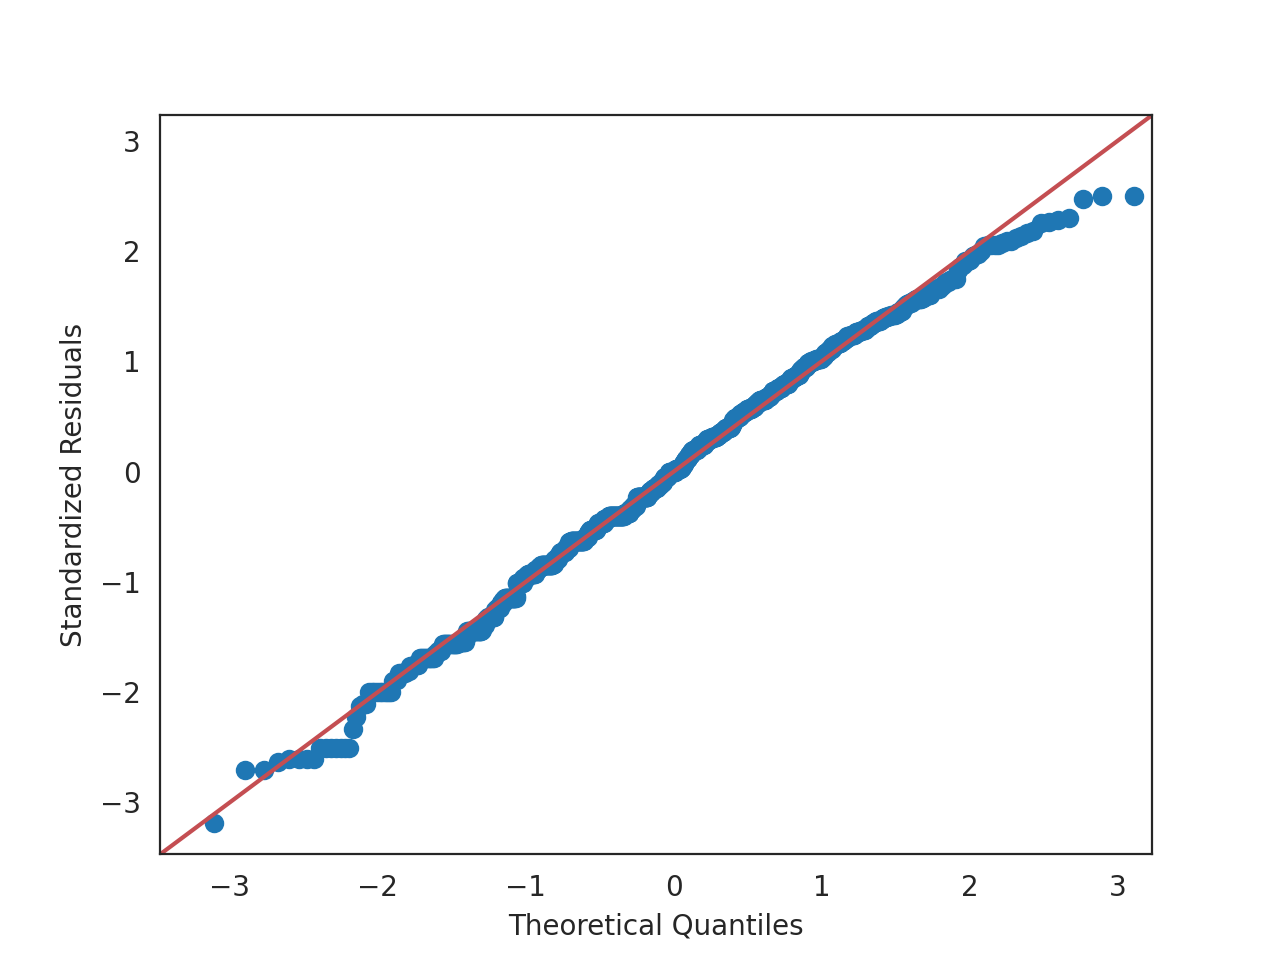

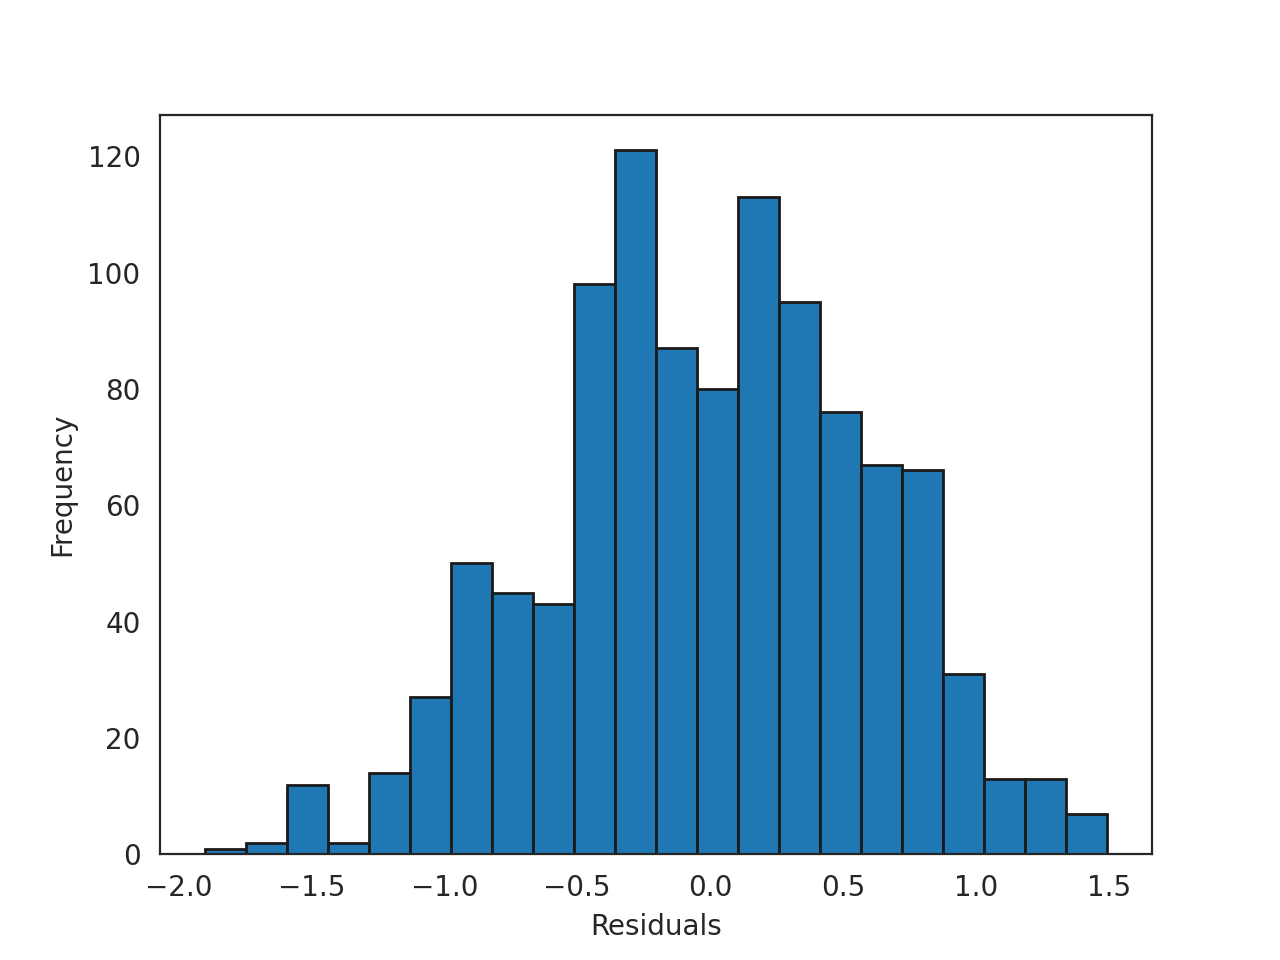

In [33]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res2.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res2.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [34]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res2.levene(df=data, res_var='log_TOTSPACE', xfac_var=['SUBCONTR','CWELCCFL'])
res2.levene_summary

,Parameter,Value
0,Test statistics (W),1.4980
1,Degrees of freedom (Df),3.0000
2,p value,0.2135


#### **Findings:**

Here is the revised version with corrected grammar and punctuation:

Based on the model, there is a statistically significant joint effect. The p-values for the availability of fee subsidy contract (p = 0.0000000000001497549) and participation in CWELCC program (p = 0.001236067) are low (both p < 0.05), indicating that both variables individually have a significant impact on the log-transformed total child care spaces.

The p-value for the interaction between availability of fee subsidy contract and participation in CWELCC program (p = 0.003179021) is also significant. The interaction effect significantly contributes to the variation in child care spaces.

The interaction plot suggests that there is a significant interaction effect between availability of fee subsidy contract and participation of the center in CWELCC program, i.e., between categorical variables 'SUBCONTR' and 'CWELCCFL'. The crossing in the middle implies that the combined effect of the variables is changing direction between the levels, and it's neither consistently positive nor consistently negative.

The post-hoc test suggests that there is no significant difference in child care spaces between centers with fee subsidy that are part of CWELCC program and those that are not part of the CWELL program. The p-value in this instance equals 0.415859. In all other instances, the p-value is low, suggesting significant differences.

The assumption check suggests that the residuals are not normally distributed but have a shape that is close to a bell curve. For the second assumption, Levene's test for homogeneity of variance has been employed. With the p-value equal to 0.2135, the findings fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the variances are significantly different among the groups.

Reference:

1. Canada-Wide Early Learning & Child Care (CWELCC) System – Operator Information, Retrieved from https://www.toronto.ca/community-people/community-partners/early-learning-child-care-partners/canada-wide-early-learning-child-care-agreement-cwelcc/

2. Child Care Fee Subsidy – Required Documents, Retrieved from https://www.toronto.ca/community-people/employment-social-support/child-family-support/child-care-support/child-care-fee-subsidy-eligibility-meeting-documents/

3. Python for Data Science:One way ANOVA, Retrieved from https://www.pythonfordatascience.org/anova-python/

4. Introduction to ANOVA for Statistics and Data Science, Retrieved from https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

5. JAN, A. U., JAN, D., YOUSAF HAYAT, A. S., ALI, G., & FAYAZ, M. (2014). Logrithmic transformation: a tool for normalizing residuals in Anova models. Sarhad Journal of Agriculture, 30(3), 375-378.

6. One-way ANOVA, Retrieved from
https://www.pythonfordatascience.org/anova-python/

7. Childs, D. Z., Hindle, B. J., & Warren, P. H. (Year). APS 240: Data Analysis and Statistics with R, Retrieved from https://dzchilds.github.io/stats-for-bio/data-transformations.html

8. Does your data violate one-way ANOVA assumptions?, Retrieved from https://quality-control-plan.com/StatGuide/oneway_anova_ass_viol.htm#:~:text=If%20the%20populations%20from%20which,may%20be%20incorrect%20or%20misleading.